<a href="https://colab.research.google.com/github/Anchalrai2007/9.Customer-Support-Case-Type-Classification_202401100300039-/blob/main/202401100300039.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Support Case Type Classification
Classify support cases into billing, technical, or general queries.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [22]:
# Step 2: Load dataset
df = pd.read_csv('/content/support_cases.csv')



In [23]:
# Step 3: Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['case_type'])  # case_type is the correct column name



In [24]:
# Step 4: Define features (X) and target (y)
X = df[['message_length', 'response_time']]
y = df['label']



In [25]:
# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
# Step 6: Train classifier
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [27]:
# Step 7: Predict
y_pred = model.predict(X_test)


In [28]:
# Step 8: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.35
Precision: 0.50
Recall: 0.35

Classification Report:

              precision    recall  f1-score   support

     billing       0.67      0.18      0.29        11
     general       0.27      0.60      0.38         5
   technical       0.33      0.50      0.40         4

    accuracy                           0.35        20
   macro avg       0.42      0.43      0.35        20
weighted avg       0.50      0.35      0.33        20



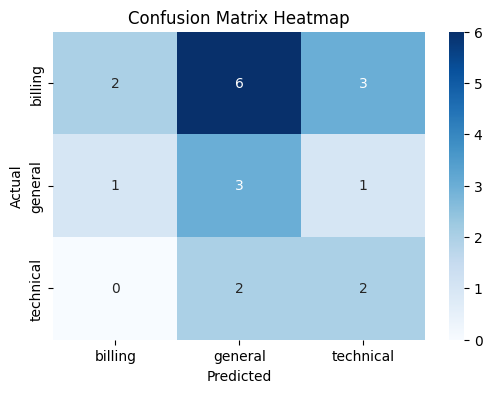

In [29]:
# Step 9: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()